Análise dos dados sobre adoção de animais disponível no Kaggle

🐾 Predict Pet Adoption Status Dataset 🐾
Insights into Factors Influencing Pet Adoption Rates
https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset?resource=download

Passos a serem feitos

Importar os dados com pandas CSV
Limpar os dados 
Analise exploratoria 
Analise de dados 
Adentificar se há correlação entre valor cobrado de taxa e a adoção
Identificar se há correlação entre raça e adoção
Identificar idade mais adotada

Informações dobre os dados 
PetID: Identificador exclusivo para cada animal de estimação. #Excluída após verificar que nâo há valores repetidos#

PetType: Tipo de animal de estimação (por exemplo, Cachorro, Gato, Pássaro, Coelho).

Breed: Raça específica do animal de estimação.

AgeMonths: Idade do pet em meses.

Color: Cor do animal de estimação.

Size: Categoria de tamanho do animal de estimação (Pequeno, Médio, Grande).

WeightKg: Peso do animal em quilogramas.

Vaccinated: Situação vacinal do animal (False - Não vacinado, True - Vacinado).

HealthCondition: Estado de saúde do animal de estimação (False - Saudável, True - Condição médica).

TimeInShelterDays: Tempo que o animal está no abrigo (dias).

AdoptionFee: Taxa de adoção cobrada pelo animal de estimação (em dólares).

PreviousOwner: Se o animal teve dono anterior (False - Não, True - Sim).

AdoptionLikelihood: Probabilidade do animal ser adotado (False - Improvável, True - Provável)

Instalando as bibliotecas necessárias.

# Instale silenciosamente a biblioteca necessária e atualize o virtualenv.

Análise dos dados sobre adoção de animais disponível no Kaggle

🐾 Predict Pet Adoption Status Dataset 🐾
Insights into Factors Influencing Pet Adoption Rates
https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset?resource=download

Passos a serem feitos

Importar os dados com pandas CSV
Limpar os dados 
Analise exploratoria 
Analise de dados 
Adentificar se há correlação entre valor cobrado de taxa e a adoção
Identificar se há correlação entre raça e adoção
Identificar idade mais adotada

Informações dobre os dados 
PetID: Identificador exclusivo para cada animal de estimação. #Excluída após verificar que nâo há valores repetidos#

PetType: Tipo de animal de estimação (por exemplo, Cachorro, Gato, Pássaro, Coelho).

Breed: Raça específica do animal de estimação.

AgeMonths: Idade do pet em meses.

Color: Cor do animal de estimação.

Size: Categoria de tamanho do animal de estimação (Pequeno, Médio, Grande).

WeightKg: Peso do animal em quilogramas.

Vaccinated: Situação vacinal do animal (False - Não vacinado, True - Vacinado).

HealthCondition: Estado de saúde do animal de estimação (False - Saudável, True - Condição médica).

TimeInShelterDays: Tempo que o animal está no abrigo (dias).

AdoptionFee: Taxa de adoção cobrada pelo animal de estimação (em dólares).

PreviousOwner: Se o animal teve dono anterior (False - Não, True - Sim).

AdoptionLikelihood: Probabilidade do animal ser adotado (False - Improvável, True - Provável)

# Instale silenciosamente a biblioteca necessária e atualize o virtualenv.

In [1]:
# Quietly install necessary library and upgrade virtualenv.
!pip3 install -q -U pandas matplotlib seaborn scipy 


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip


# Importe bibliotecas de ciência de dados.

In [2]:
# Import data science libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# Carrega dados csv usando ";" como delimitador e "," como indicador decimal.

In [3]:
# Load csv data using ";" as a delimiter and "," as decimal indicator.
df = pd.read_csv("/Users/george/Desktop/Python2024Prog/Analise de Dados/pet_adoption_data.csv", delimiter = ";", decimal=",")

# Imprime as informações do dataframe após o método `head` ser chamado para resumir o dataframe.

In [4]:
# Print the dataframe info after the `head` method is called to summarize the dataframe.
print(df.head())
print("\n")
print(df.info())

  PetType             Breed  AgeMonths   Color    Size  WeightKg  Vaccinated  \
0    Bird          Parakeet        131  Orange   Large      5.04        True   
1  Rabbit            Rabbit         73   White   Large     16.09       False   
2     Dog  Golden Retriever        136  Orange  Medium      2.08       False   
3    Bird          Parakeet         97   White   Small      3.34       False   
4  Rabbit            Rabbit        123    Gray   Large     20.50       False   

   HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0            False                 27          140          False   
1            False                  8          235          False   
2            False                 85          385          False   
3            False                 61          217           True   
4            False                 28           14           True   

   AdoptionLikelihood  
0               False  
1               False  
2               False  
3       

# Reformate o dataframe.
# Categorize as colunas não numéricas, converta a coluna de peso em flutuante e defina a precisão de exibição para 2 casas decimais.

In [5]:
# Reformat the dataframe.
# Categorize the non-numeric columns, convert the weight column to float, and set the display precision to 2 decimal places.
df["PetType"] = df["PetType"].astype("category")
df["Color"] = df["Color"].astype("category")
df["Size"] = df["Size"].astype("category")
df["Breed"] = df["Breed"].astype("category")
df["WeightKg"] = df["WeightKg"].astype("float")
pd.set_option("display.precision", 2)



# Execute diagnósticos básicos no dataframe.
# * Imprime o resumo dos valores ausentes.
# * Imprima valores exclusivos para cada coluna.

In [6]:
# Perform basic diagnostics on dataframe.
# * Print summary of missing values.
# * Print unique values for each column.
print(df.isnull().sum())
for col in df.columns:
    print(f"Column '{col}';")
    print(df[col].unique())
    print()


PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64
Column 'PetType';
['Bird', 'Rabbit', 'Dog', 'Cat']
Categories (4, object): ['Bird', 'Cat', 'Dog', 'Rabbit']

Column 'Breed';
['Parakeet', 'Rabbit', 'Golden Retriever', 'Labrador', 'Siamese', 'Persian', 'Poodle']
Categories (7, object): ['Golden Retriever', 'Labrador', 'Parakeet', 'Persian', 'Poodle', 'Rabbit', 'Siamese']

Column 'AgeMonths';
[131  73 136  97 123  70 169  13  49  60 130   5 172  27 160 149   8  50
  67  44 125  58   3  86   2 102  35  98  30 116 150  36  77  31  47  55
 106 158 121 144  12 145 140  23  92 115 104 118 108  65  84  32 161  16
  38 142 151 114  66 105  85  75 154   6 163 171 143 101  42 166  82 173
 134  80   7  14  91  20  10  25  54  33 164  95 110 141 117  7

# Imprima várias estatísticas do quadro de dados para análise visual rápida.

In [7]:
# Print various statistics of the data frame for quick visual analysis.
print("\n")
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df['PetType'].value_counts())
print("\n")
print(df['Breed'].value_counts())
print("\n")
print(df['Color'].value_counts())
print("\n")
print(df['Size'].value_counts())
print("\n")
print(df['Vaccinated'].value_counts())
print("\n")
print(df['HealthCondition'].value_counts())
print("\n")
print(df['PreviousOwner'].value_counts())
print("\n")
print(df['AdoptionLikelihood'].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PetType             2007 non-null   category
 1   Breed               2007 non-null   category
 2   AgeMonths           2007 non-null   int64   
 3   Color               2007 non-null   category
 4   Size                2007 non-null   category
 5   WeightKg            2007 non-null   float64 
 6   Vaccinated          2007 non-null   bool    
 7   HealthCondition     2007 non-null   bool    
 8   TimeInShelterDays   2007 non-null   int64   
 9   AdoptionFee         2007 non-null   int64   
 10  PreviousOwner       2007 non-null   bool    
 11  AdoptionLikelihood  2007 non-null   bool    
dtypes: bool(4), category(4), float64(1), int64(3)
memory usage: 79.4 KB
None


       AgeMonths  WeightKg  TimeInShelterDays  AdoptionFee
count    2007.00   2007.00            2007.00      2

# Este trecho fornece uma análise estatística do relacionamento entre `PetType` e `AdoptionLikelihood` no DataFrame `df`.
# A análise inclui:
# - Contando animais por `PetType` (usando value_counts e plotando com matplotlib)
# - Calculando a probabilidade de adoção por `PetType` (usando groupby e média)
# - Realizando um teste qui-quadrado para determinar se existe uma relação significativa entre `PetType` e `AdoptionLikelihood`
# - Gerando os resultados da análise estatística, incluindo a estatística qui-quadrado, valor p e graus de liberdade

Contagem de animais por categoria


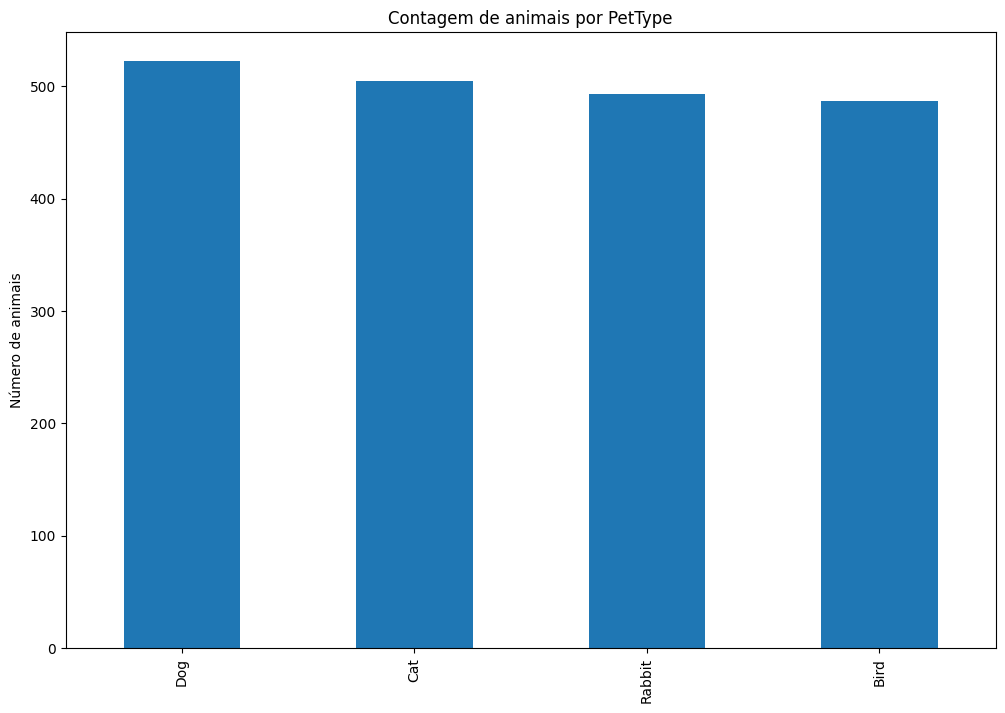



Probabilidade de adoção por tipo de pet
PetType
Bird      0.30
Cat       0.29
Dog       0.46
Rabbit    0.25
Name: AdoptionLikelihood, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/2485557552.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  animal_type_adoption_rate = df.groupby('PetType')['AdoptionLikelihood'].mean()


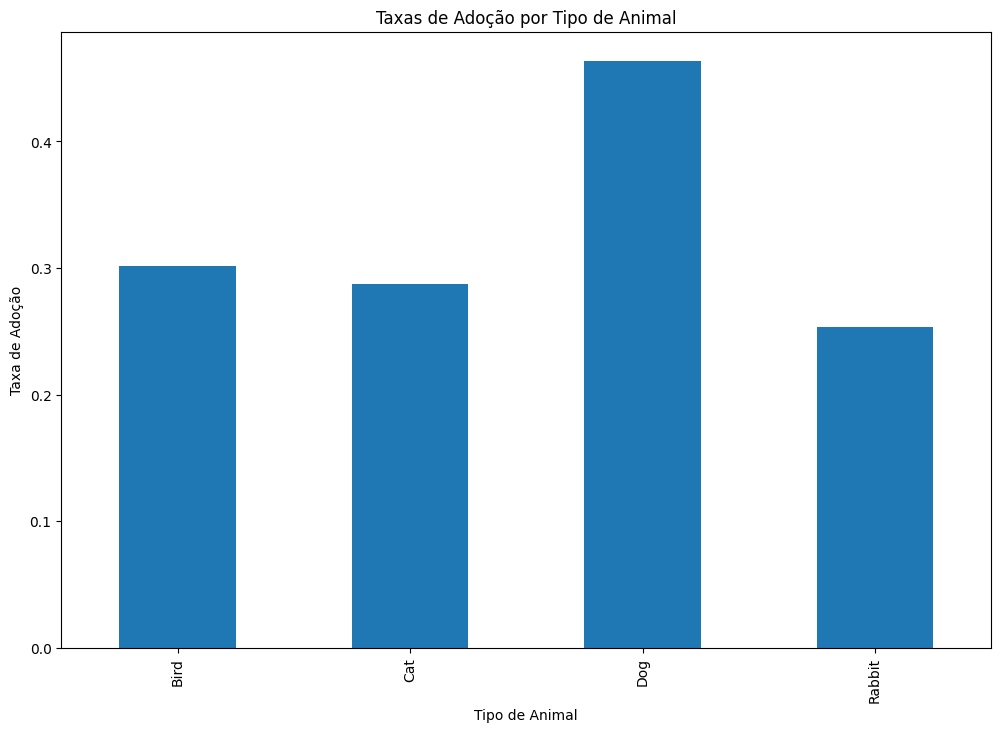



Estatística do Qui-Quadrado: 61.25
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre o tipo de animal e a probabilidade de adoção.
O valor do qui-quadrado (61.25) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [8]:
# This snippet provides a statistical analysis of the relationship between `PetType` and `AdoptionLikelihood` in the DataFrame `df`. 
# The analysis includes:
# - Counting animals by `PetType` (using value_counts and plotting with matplotlib)
# - Calculating the probability of adoption by `PetType` (using groupby and mean)
# - Performing a chi-squared test to determine if there is a significant relationship between `PetType` and `AdoptionLikelihood`
# - Outputting the results of the statistical analysis, including the chi-squared statistic, p-value, and degrees of freedom

# Distribuição dos animais por tipo de Pet 
# Contagem de animais por categoria 
print("Contagem de animais por categoria")
df['PetType'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Contagem de animais por PetType')
plt.ylabel('Número de animais')
plt.xlabel("")
plt.show()
print("\n")

# Probabilidade de adoção por tipo de Animal 
print("Probabilidade de adoção por tipo de pet")
animal_type_adoption_rate = df.groupby('PetType')['AdoptionLikelihood'].mean()
print(animal_type_adoption_rate)
print("\n")
plt.figure(figsize=(12, 8))
animal_type_adoption_rate.plot(kind='bar')
plt.title('Taxas de Adoção por Tipo de Animal')
plt.xlabel('Tipo de Animal')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")

# Teste de chi-quadrado
contingency_table = pd.crosstab(df['PetType'], df['AdoptionLikelihood'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre o tipo de animal e a probabilidade de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre o tipo de animal e a probabilidade de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")

# Este código inclui análise de dados e testes estatísticos para examinar a relação entre a raça do animal de estimação e a probabilidade de adoção. Ele calcula a distribuição das raças, as taxas de adoção e realiza um teste qui-quadrado.

Distribuição dos animais por raça


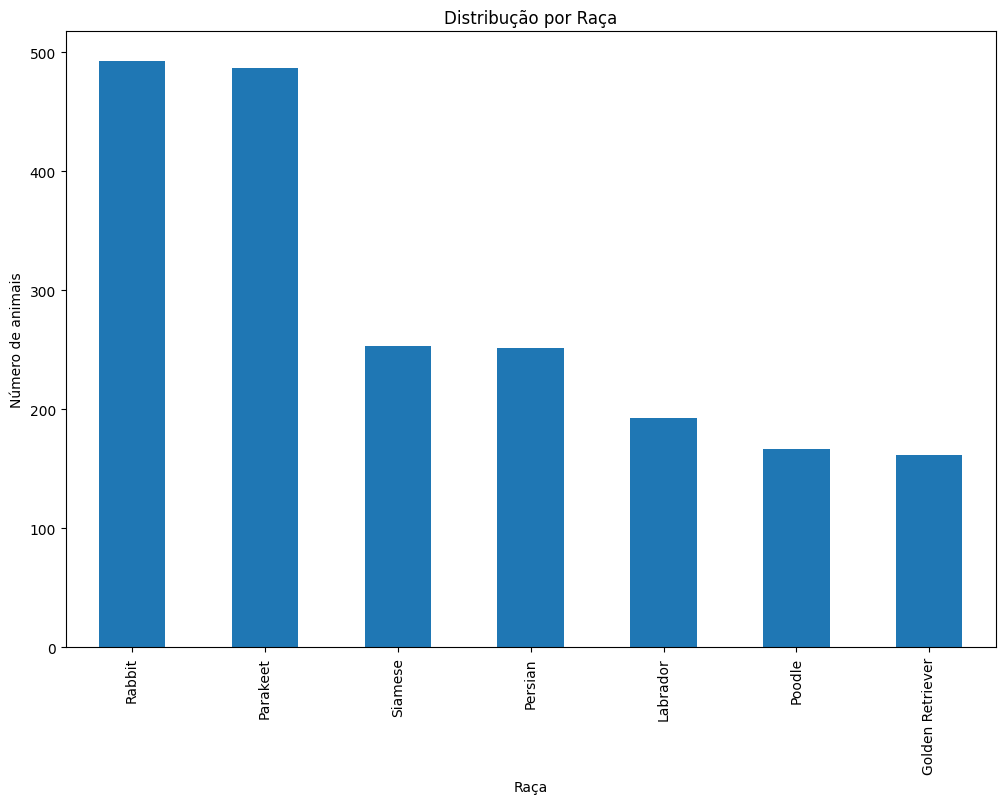



Indice de adoção por Raça
Breed
Golden Retriever    0.29
Labrador            0.72
Parakeet            0.30
Persian             0.27
Poodle              0.34
Rabbit              0.25
Siamese             0.31
Name: AdoptionLikelihood, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/4050028157.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adoption_rates = df.groupby('Breed')['AdoptionLikelihood'].mean()


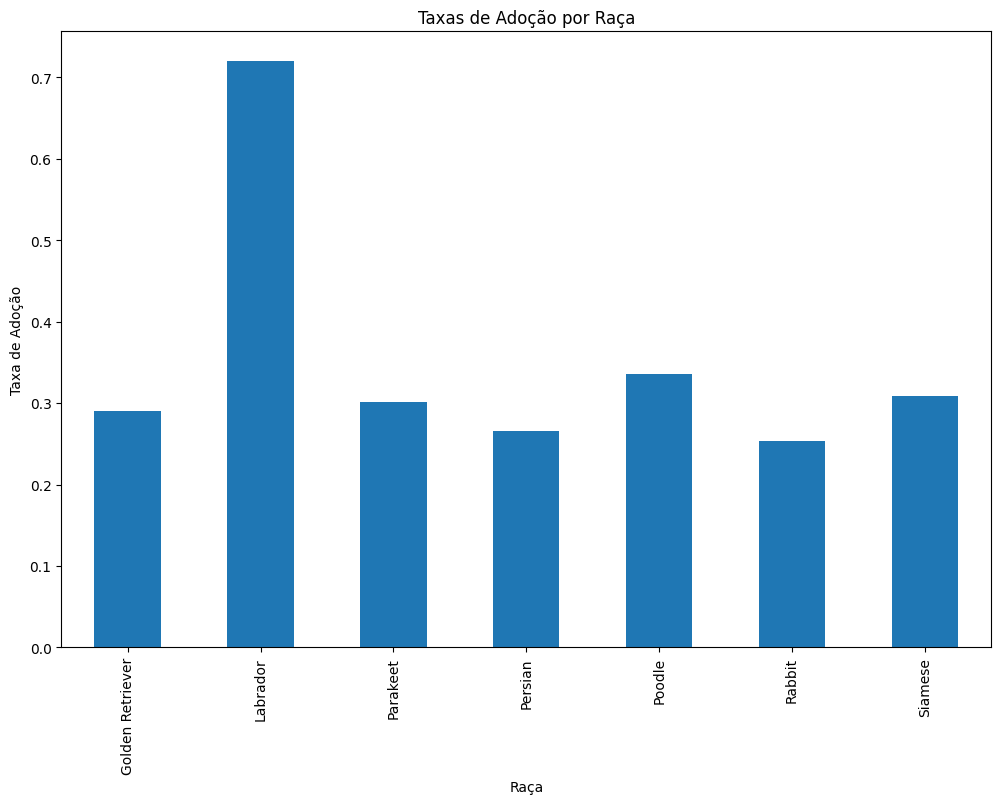



Estatística do Qui-Quadrado: 154.47
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre a raça e a probabilidade de adoção.
O valor do qui-quadrado (154.47) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [9]:

# This code includes data analysis and statistical tests to examine the relationship between pet breed and adoption likelihood. It calculates breed distribution, adoption rates, and performs a chi-squared test.

# Distribuição dos animais por raça de Pet
print("Distribuição dos animais por raça")
df['Breed'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Distribução por Raça')
plt.xlabel('Raça')
plt.ylabel('Número de animais')
plt.show()
print("\n")

print("Indice de adoção por Raça")
adoption_rates = df.groupby('Breed')['AdoptionLikelihood'].mean()
print(adoption_rates)
print("\n")
plt.figure(figsize=(12, 8))
adoption_rates.plot(kind='bar')
plt.title('Taxas de Adoção por Raça')
plt.xlabel('Raça')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['Breed'], df['AdoptionLikelihood'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a raça e a probabilidade de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a raça e a probabilidade de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")


# Resuma os resultados das estatísticas realizadas para avaliar a relação entre raça e taxa de adoção.

Média da taxa de adoção por raça
Breed
Golden Retriever    249.83
Labrador            248.58
Parakeet            261.80
Persian             247.31
Poodle              244.08
Rabbit              240.28
Siamese             247.22
Name: AdoptionFee, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/497354867.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  breed_adoption_rate_fee = df.groupby('Breed')['AdoptionFee'].mean()


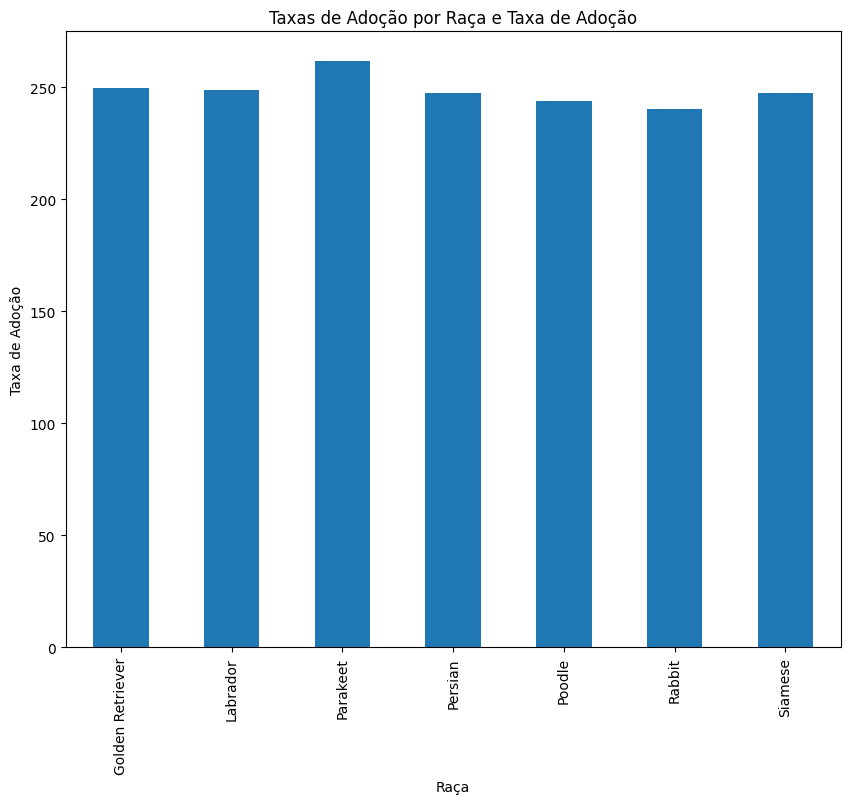



Estatística do Qui-Quadrado: 2945.45
Valor-p: 0.5305
Não há evidências suficientes para dizer que existe uma relação entre a raça e a taxa de adoção.
O valor do qui-quadrado (2945.45) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [10]:

# Summarize results of the statistics performed to evaluate the relationship between breed and adoption fee.
# Taxa de adoção relacinado ao valor da taxa
print("Média da taxa de adoção por raça")
breed_adoption_rate_fee = df.groupby('Breed')['AdoptionFee'].mean()
print(breed_adoption_rate_fee)
print("\n")
plt.figure(figsize=(10, 8))
breed_adoption_rate_fee.plot(kind='bar')
plt.title('Taxas de Adoção por Raça e Taxa de Adoção')
plt.xlabel('Raça')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['Breed'], df['AdoptionFee'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a raça e a taxa de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a raça e a taxa de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")


# O código a seguir realiza um teste qui-quadrado para determinar se existe uma relação entre o estado de saúde dos animais e sua taxa de adoção.
# Ele começa criando uma tabela de contingência usando `pd.crosstab()` e, em seguida, calcula a estatística qui-quadrado, valor p, graus de liberdade e valores esperados usando `chi2_contingency()`.
# Os resultados são impressos no console, juntamente com uma interpretação do valor p e do valor qui-quadrado em termos da força do relacionamento entre as variáveis.

Taxa de adoção por condição de saúde na dos animais
HealthCondition
Doente      248.41
Saudável    249.32
Name: AdoptionFee, dtype: float64




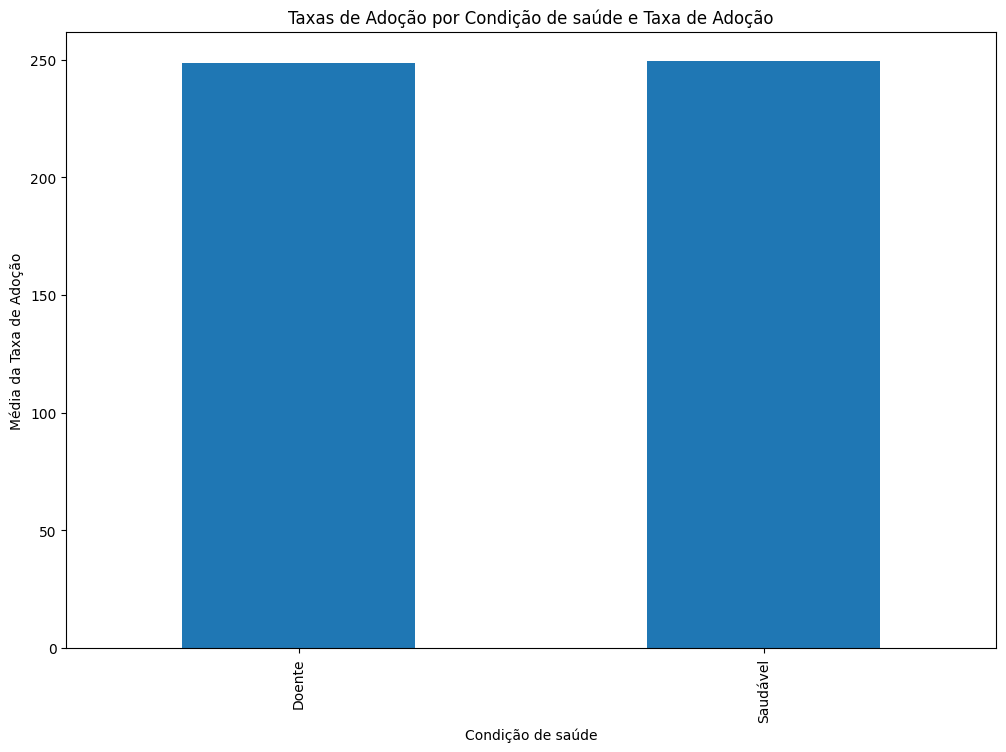



Estatística do Qui-Quadrado: 505.08
Valor-p: 0.3320
Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a taxa de adoção.
O valor do qui-quadrado (505.08) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.


Condição de saúde em relação a taxa de adoção
HealthCondition
Doente       394
Saudável    1613
Name: AdoptionLikelihood, dtype: int64




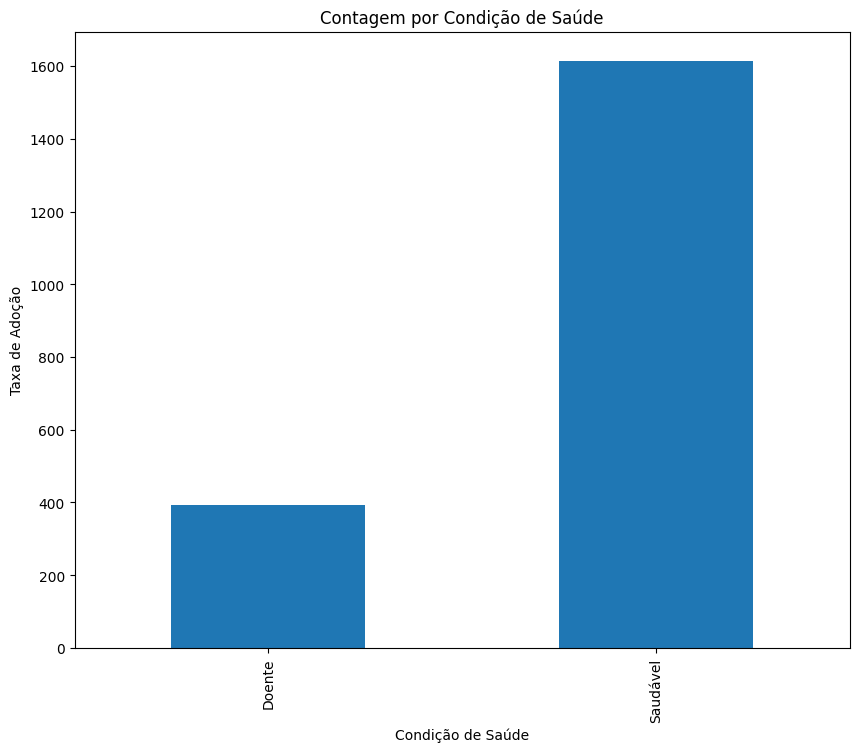



Estatística do Qui-Quadrado: 118.24
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre a condição de saúde e a probabilidade de adoção.
O valor do qui-quadrado (118.24) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [11]:

# The following code performs a chi-squared test to determine whether there is a relationship between the health condition of animals and their adoption fee.
# It begins by creating a contingency table using `pd.crosstab()`, then calculates the chi-squared statistic, p-value, degrees of freedom, and expected values using `chi2_contingency()`.
# The results are printed to the console, along with an interpretation of the p-value and chi-squared value in terms of the strength of the relationship between the variables.
df['HealthCondition'] = df['HealthCondition'].replace(False, "Saudável")
df['HealthCondition'] = df['HealthCondition'].replace(True, "Doente")


# Condição de saúde pela taxa de adoção
print("Taxa de adoção por condição de saúde na dos animais")
Health_adoption_rate_fee = df.groupby('HealthCondition')['AdoptionFee'].mean()
print(Health_adoption_rate_fee)
print("\n")
plt.figure(figsize=(12, 8))
Health_adoption_rate_fee.plot(kind='bar')
plt.title('Taxas de Adoção por Condição de saúde e Taxa de Adoção')
plt.xlabel('Condição de saúde')
plt.ylabel('Média da Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['HealthCondition'], df['AdoptionFee'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a condição de saúde e a taxa de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a taxa de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")


# Health Condition
print("Condição de saúde em relação a taxa de adoção")
health_adoption_rate = df.groupby('HealthCondition')['AdoptionLikelihood'].count()
print(health_adoption_rate)
print("\n")
plt.figure(figsize=(10, 8))
health_adoption_rate.plot(kind='bar')
plt.title('Contagem por Condição de Saúde')
plt.xlabel('Condição de Saúde')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['HealthCondition'], df['AdoptionLikelihood'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a condição de saúde e a probabilidade de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a probabilidade de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")



# Correlação computacional entre AdoptionLikelihood e AgeMonths.
# Calcule taxas de adoção para diferentes faixas etárias: Filhote (0-12 meses), Adulto (12-36 meses) e Sênior (36 meses ou mais).
# Calcular taxas de adoção por AdoptionLikelihood.
# Trace um gráfico de barras das taxas de adoção por faixa etária.
# Execute o teste qui-quadrado para avaliar a relação entre AdoptionLikelihood e AgeMonths.

Correlation coefficient: -0.20220897333608434
AgeMonths
Puppy      6.68
Adult     24.01
Senior    68.51
Name: AgeMonths, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/2421809719.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adoption_rates_by_age = df.groupby(age_groups)['AgeMonths'].mean()


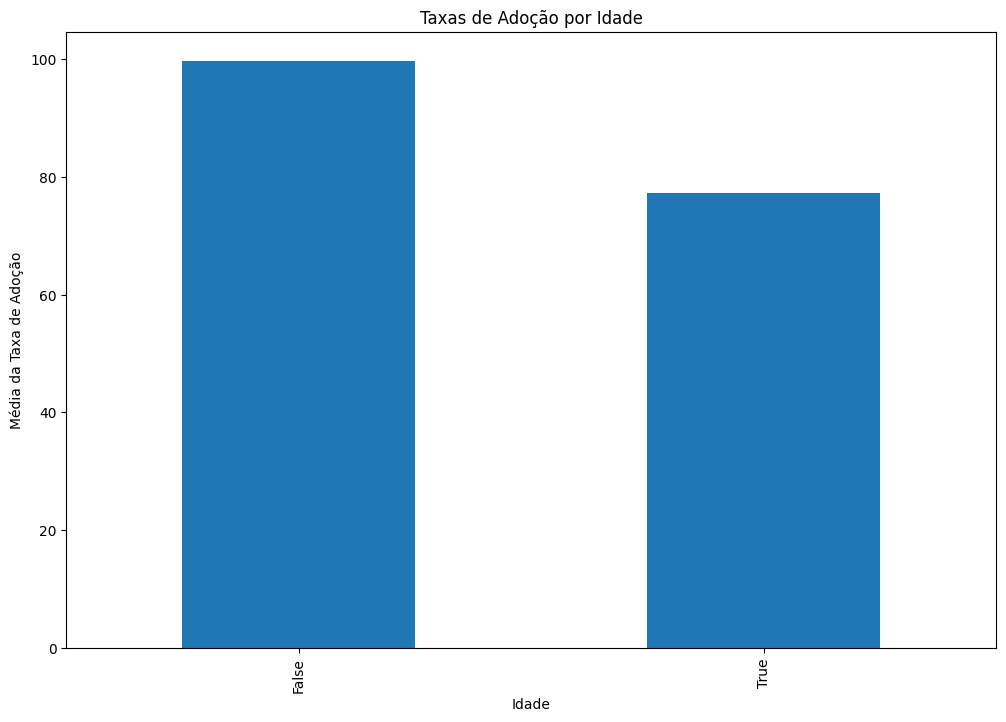



Estatística do Qui-Quadrado: 357.90
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre a condição de saúde e a taxa de adoção.
O valor do qui-quadrado (357.90) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [12]:
# Compute correlation between AdoptionLikelihood and AgeMonths.
# Compute adoption rates for different age groups: Puppy (0-12 months), Adult (12-36 months), and Senior (36 months and older).
# Compute adoption rates by AdoptionLikelihood.
# Plot bar chart of adoption rates by age group.
# Perform chi-squared test to assess the relationship between AdoptionLikelihood and AgeMonths.

# Correlation coefficient
correlation = df['AdoptionLikelihood'].corr(df['AgeMonths'])
print(f"Correlation coefficient: {correlation}")

# Group ages and compare adoption rates
age_groups = pd.cut(df['AgeMonths'], bins=[0, 12, 36, 100], labels=['Puppy', 'Adult', 'Senior'])
adoption_rates_by_age = df.groupby(age_groups)['AgeMonths'].mean()
print(adoption_rates_by_age)



# Idade pela taxa de adoção
adoption_rates_by_age = df.groupby('AdoptionLikelihood')['AgeMonths'].mean()
print("\n")
plt.figure(figsize=(12, 8))
adoption_rates_by_age.plot(kind='bar')
plt.title('Taxas de Adoção por Idade')
plt.xlabel('Idade')
plt.ylabel('Média da Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['AdoptionLikelihood'], df['AgeMonths'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a condição de saúde e a taxa de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a taxa de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")






# Crie uma matriz variável fictícia para df2, usada para construir a matriz de correlação.

In [13]:
# Create a dummy variable matrix for df2, used to build the correlation matrix.

df2= df
df2 = pd.get_dummies(df2, columns=["PetType"])
df2 = pd.get_dummies(df2, columns=["Breed"])
df2 = pd.get_dummies(df2, columns=["Color"])
df2 = pd.get_dummies(df2, columns=["Size"])
df2 = pd.get_dummies(df2, columns=["HealthCondition"])




# Calcula a correlação e imprime-a no console.

In [14]:
# Compute the correlation and prints it to console.
correlation_matrix = df2.corr()
print(correlation_matrix)


                          AgeMonths  WeightKg  Vaccinated  TimeInShelterDays  \
AgeMonths                  1.00e+00 -2.92e-02   -1.80e-03           3.68e-02   
WeightKg                  -2.92e-02  1.00e+00    2.25e-02          -9.72e-04   
Vaccinated                -1.80e-03  2.25e-02    1.00e+00          -1.12e-03   
TimeInShelterDays          3.68e-02 -9.72e-04   -1.12e-03           1.00e+00   
AdoptionFee               -3.81e-02 -2.37e-03    2.17e-02          -7.10e-03   
PreviousOwner              3.49e-02 -4.92e-02   -1.15e-02           7.96e-03   
AdoptionLikelihood        -2.02e-01  1.76e-02    3.01e-01           8.87e-03   
PetType_Bird              -2.26e-02  6.59e-03    4.04e-03          -1.41e-02   
PetType_Cat               -1.00e-02 -4.04e-03   -5.09e-03          -2.35e-02   
PetType_Dog                7.61e-03 -3.13e-03    2.00e-02           5.58e-03   
PetType_Rabbit             2.49e-02  7.04e-04   -1.93e-02           3.20e-02   
Breed_Golden Retriever     1.06e-02 -3.1

# Crie um mapa de calor para visualizar a matriz de correlação, mostrando as correlações entre diferentes recursos.

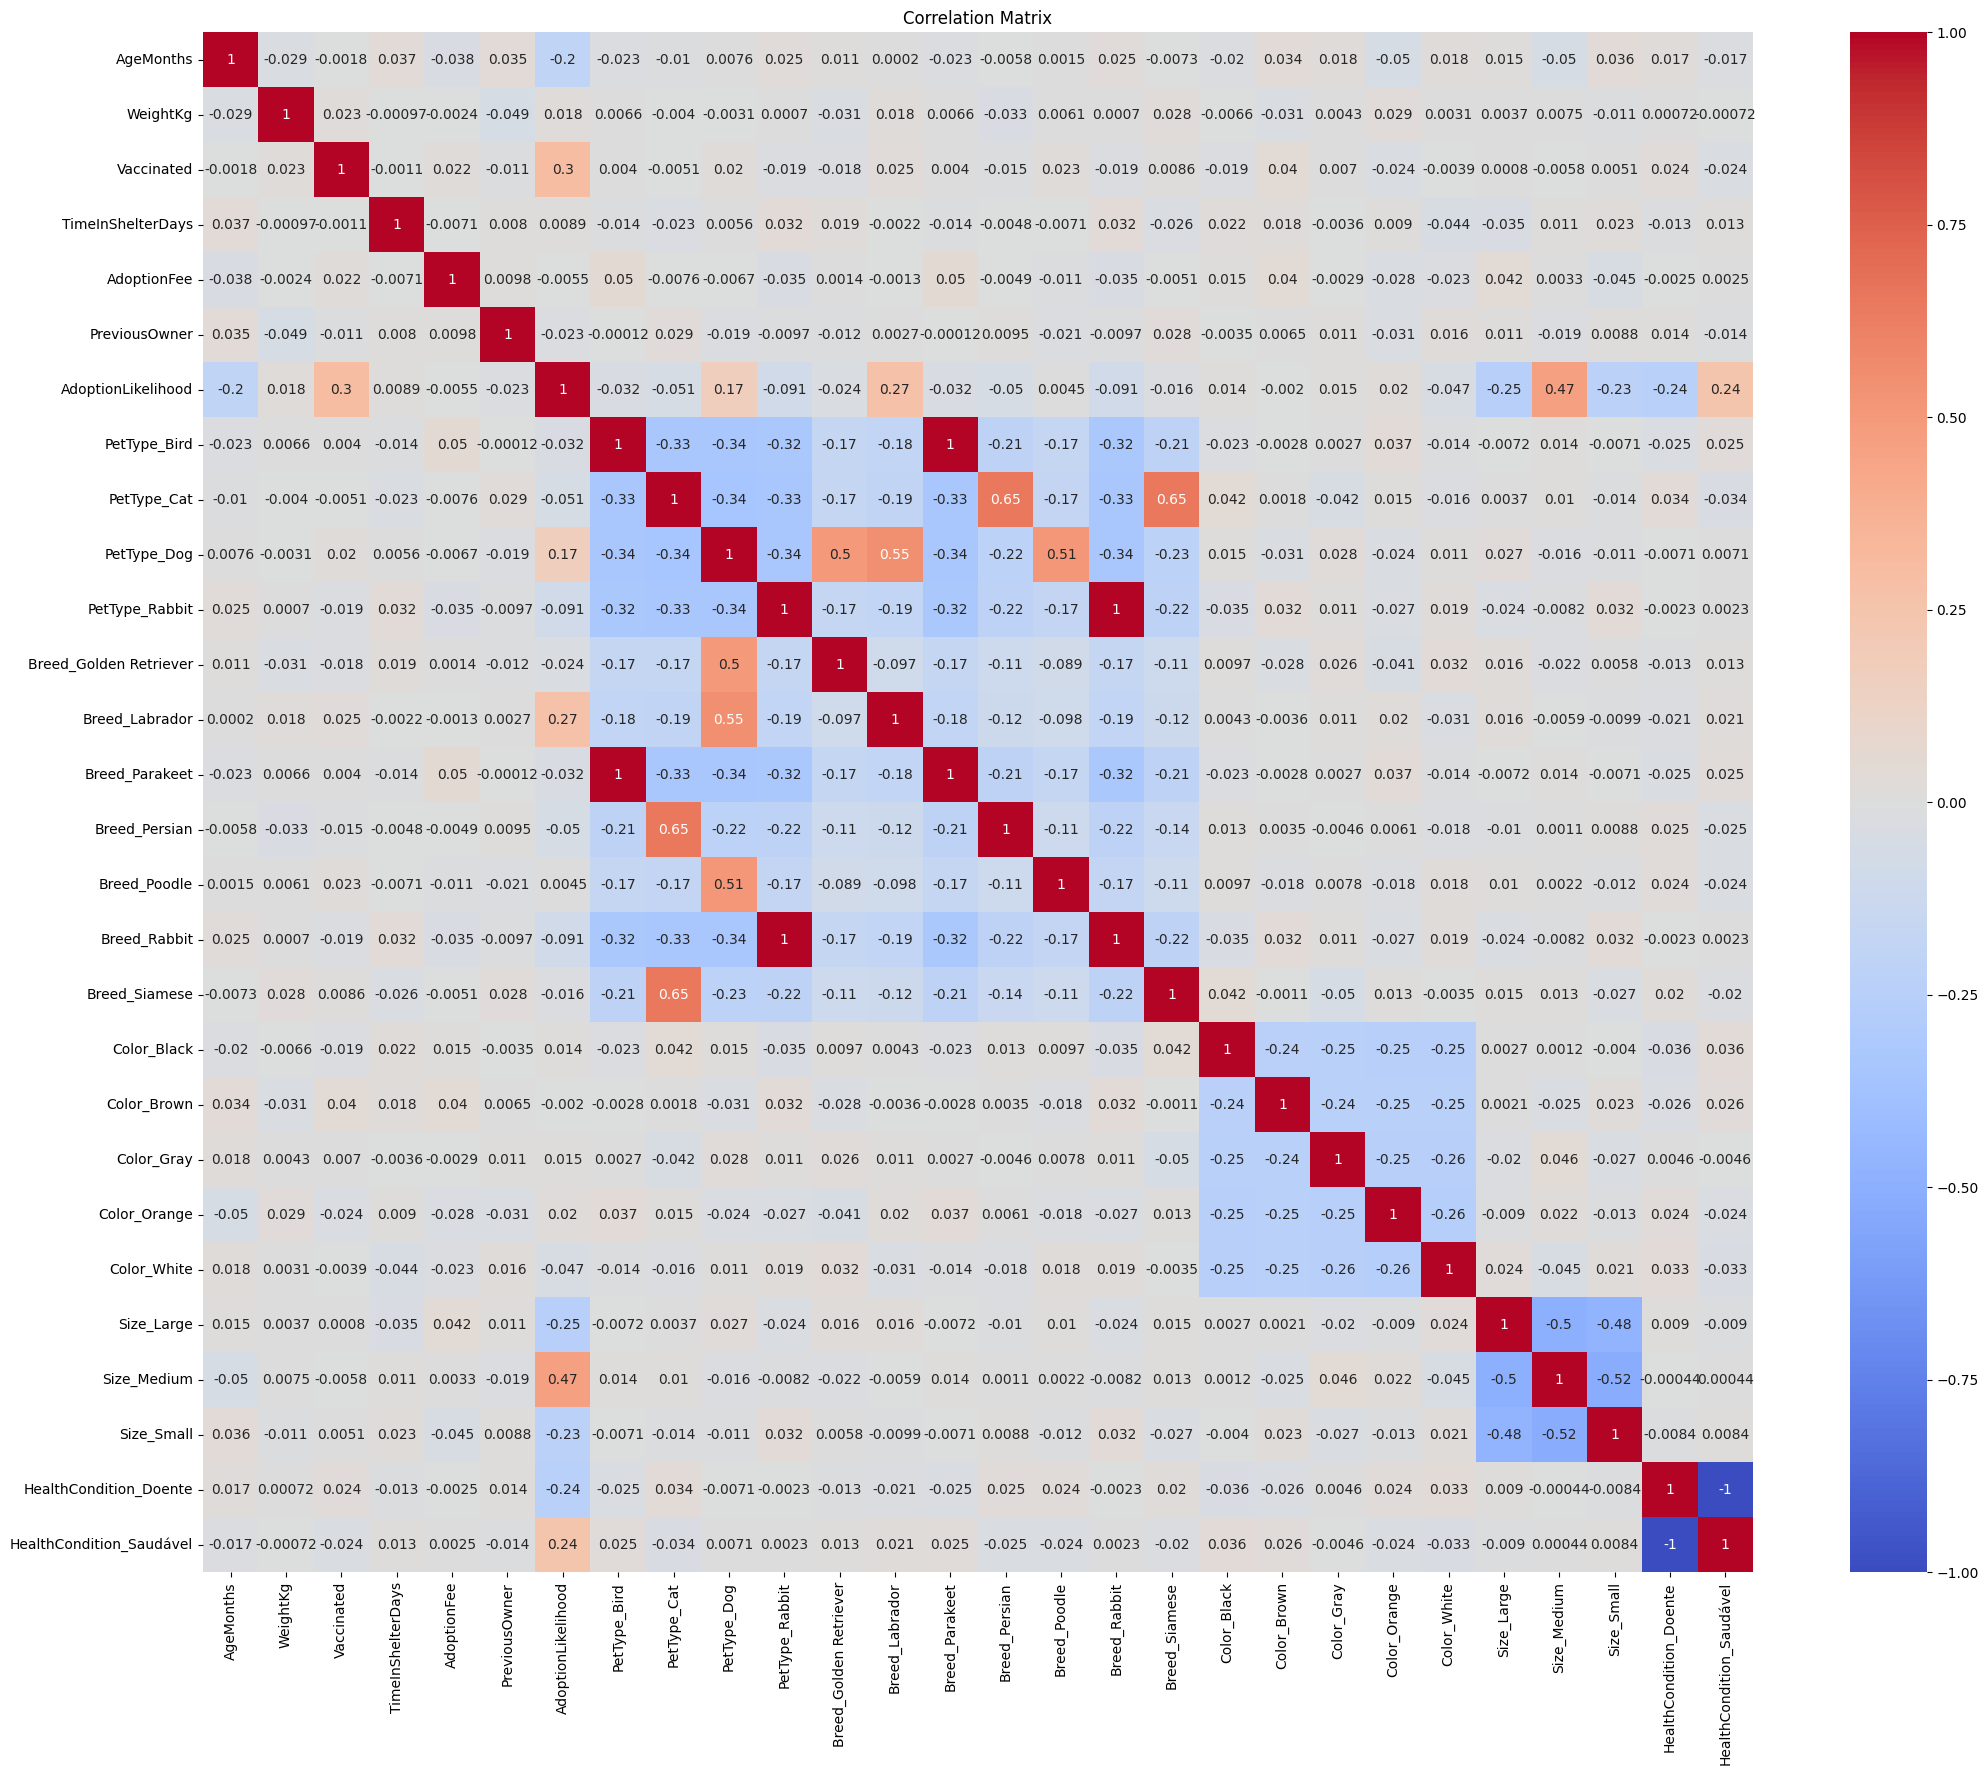

In [15]:

# Create a heatmap to visualize the correlation matrix, showing the correlations between different features.

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Trace um histograma do tempo de adoção de animais em abrigos usando pandas e matplotlib.
# Assumindo que 'OutcomeType' indica o status de adoção

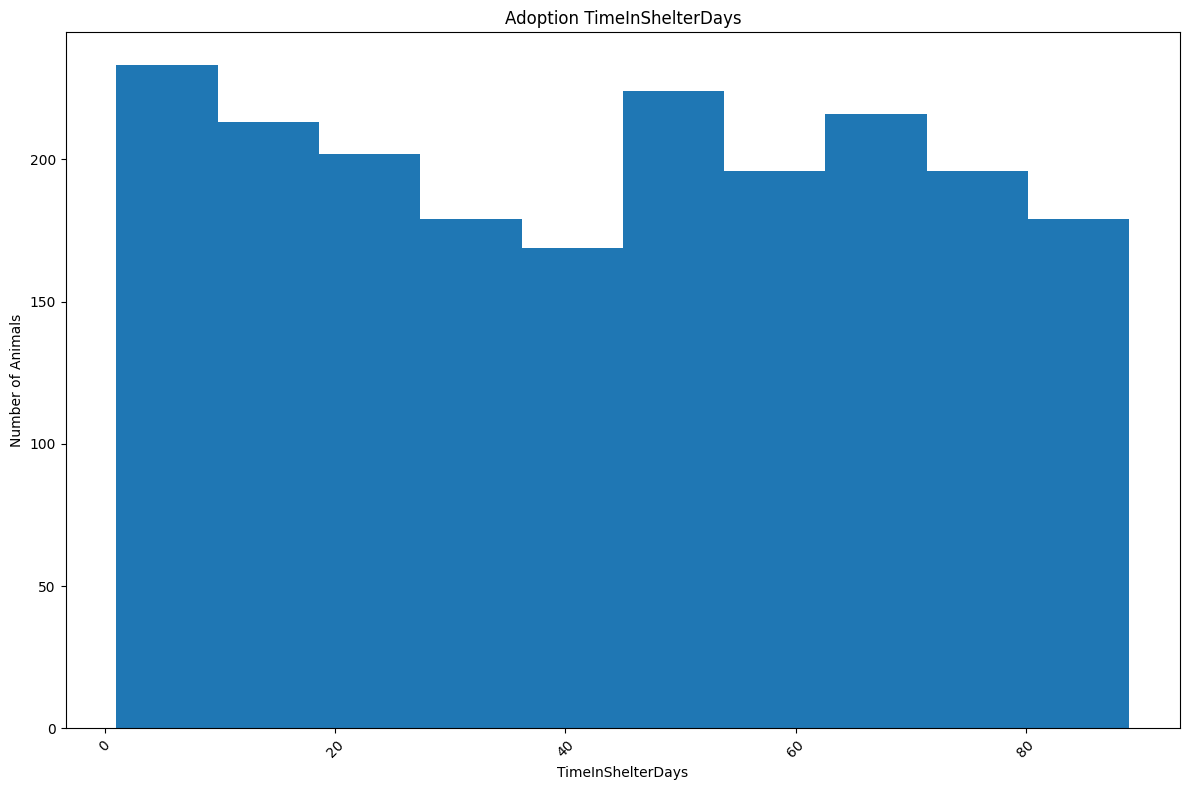

In [16]:
# Plot a histogram of animal adoption time in shelter using pandas and  matplotlib.
# Assuming 'OutcomeType' indicates adoption status
adoption_counts = df['TimeInShelterDays'].sort_values()
plt.figure(figsize=(12, 8))
adoption_counts.plot(kind='hist')
plt.title('Adoption TimeInShelterDays')
plt.xlabel('TimeInShelterDays')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Quietly install necessary library and upgrade virtualenv.
!pip3 install -q -U pandas matplotlib seaborn scipy 


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip


Importando as bilbiontecas.

# Importe bibliotecas de ciência de dados.

In [18]:
# Import data science libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


Carregando os dados do arquivo CSV com o pandas.

# Carrega dados csv usando ";" como delimitador e "," como indicador decimal.

In [19]:
# Load csv data using ";" as a delimiter and "," as decimal indicator.
df = pd.read_csv("/Users/george/Desktop/Python2024Prog/Analise de Dados/pet_adoption_data.csv", delimiter = ";", decimal=",")

Mostrar o cabeçalho do conteudo para conferir se os dados foram carregados de maneira certa.

# Imprima para stdout as primeiras linhas do DataFrame e suas informações.

In [20]:
# Print to stdout both the top few rows of the DataFrame and its information.
print(df.head())
print("\n")
print(df.info())

  PetType             Breed  AgeMonths   Color    Size  WeightKg  Vaccinated  \
0    Bird          Parakeet        131  Orange   Large      5.04        True   
1  Rabbit            Rabbit         73   White   Large     16.09       False   
2     Dog  Golden Retriever        136  Orange  Medium      2.08       False   
3    Bird          Parakeet         97   White   Small      3.34       False   
4  Rabbit            Rabbit        123    Gray   Large     20.50       False   

   HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0            False                 27          140          False   
1            False                  8          235          False   
2            False                 85          385          False   
3            False                 61          217           True   
4            False                 28           14           True   

   AdoptionLikelihood  
0               False  
1               False  
2               False  
3       

Tratamento dos dados

# Reformate o dataframe.
# Categorize as colunas não numéricas, converta a coluna de peso em flutuante e defina a precisão de exibição para 2 casas decimais.

In [21]:
# Reformat the dataframe.
# Categorize the non-numeric columns, convert the weight column to float, and set the display precision to 2 decimal places.
df["PetType"] = df["PetType"].astype("category")
df["Color"] = df["Color"].astype("category")
df["Size"] = df["Size"].astype("category")
df["Breed"] = df["Breed"].astype("category")
df["WeightKg"] = df["WeightKg"].astype("float")
pd.set_option("display.precision", 2)



Analise exploratória 

# Execute diagnósticos básicos no dataframe.
# * Imprime o resumo dos valores ausentes.
# * Imprima valores exclusivos para cada coluna.

In [22]:
# Perform basic diagnostics on dataframe.
# * Print summary of missing values.
# * Print unique values for each column.
print(df.isnull().sum())
for col in df.columns:
    print(f"Column '{col}';")
    print(df[col].unique())
    print()


PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64
Column 'PetType';
['Bird', 'Rabbit', 'Dog', 'Cat']
Categories (4, object): ['Bird', 'Cat', 'Dog', 'Rabbit']

Column 'Breed';
['Parakeet', 'Rabbit', 'Golden Retriever', 'Labrador', 'Siamese', 'Persian', 'Poodle']
Categories (7, object): ['Golden Retriever', 'Labrador', 'Parakeet', 'Persian', 'Poodle', 'Rabbit', 'Siamese']

Column 'AgeMonths';
[131  73 136  97 123  70 169  13  49  60 130   5 172  27 160 149   8  50
  67  44 125  58   3  86   2 102  35  98  30 116 150  36  77  31  47  55
 106 158 121 144  12 145 140  23  92 115 104 118 108  65  84  32 161  16
  38 142 151 114  66 105  85  75 154   6 163 171 143 101  42 166  82 173
 134  80   7  14  91  20  10  25  54  33 164  95 110 141 117  7

# Imprima várias estatísticas do quadro de dados para análise visual rápida.

In [23]:
# Print various statistics of the data frame for quick visual analysis.
print("\n")
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df['PetType'].value_counts())
print("\n")
print(df['Breed'].value_counts())
print("\n")
print(df['Color'].value_counts())
print("\n")
print(df['Size'].value_counts())
print("\n")
print(df['Vaccinated'].value_counts())
print("\n")
print(df['HealthCondition'].value_counts())
print("\n")
print(df['PreviousOwner'].value_counts())
print("\n")
print(df['AdoptionLikelihood'].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PetType             2007 non-null   category
 1   Breed               2007 non-null   category
 2   AgeMonths           2007 non-null   int64   
 3   Color               2007 non-null   category
 4   Size                2007 non-null   category
 5   WeightKg            2007 non-null   float64 
 6   Vaccinated          2007 non-null   bool    
 7   HealthCondition     2007 non-null   bool    
 8   TimeInShelterDays   2007 non-null   int64   
 9   AdoptionFee         2007 non-null   int64   
 10  PreviousOwner       2007 non-null   bool    
 11  AdoptionLikelihood  2007 non-null   bool    
dtypes: bool(4), category(4), float64(1), int64(3)
memory usage: 79.4 KB
None


       AgeMonths  WeightKg  TimeInShelterDays  AdoptionFee
count    2007.00   2007.00            2007.00      2

Analise aprofundada


# Este trecho fornece uma análise estatística do relacionamento entre `PetType` e `AdoptionLikelihood` no DataFrame `df`.
# A análise inclui:
# - Contando animais por `PetType` (usando value_counts e plotando com matplotlib)
# - Calculando a probabilidade de adoção por `PetType` (usando groupby e média)
# - Realizando um teste qui-quadrado para determinar se existe uma relação significativa entre `PetType` e `AdoptionLikelihood`
# - Gerando os resultados da análise estatística, incluindo a estatística qui-quadrado, valor p e graus de liberdade

Contagem de animais por categoria


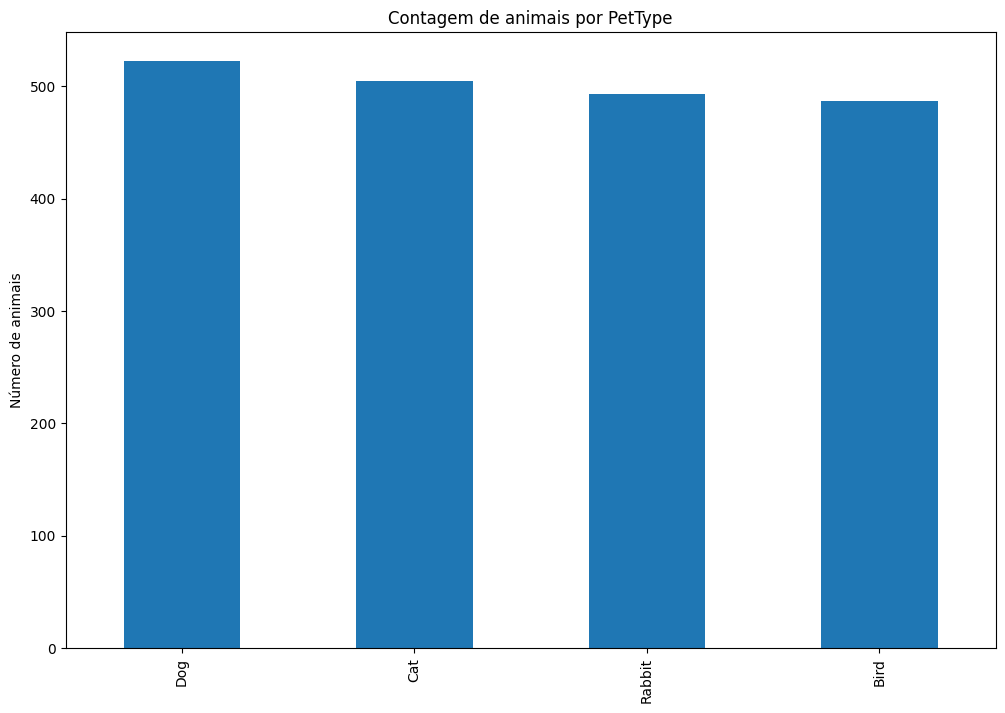



Probabilidade de adoção por tipo de pet
PetType
Bird      0.30
Cat       0.29
Dog       0.46
Rabbit    0.25
Name: AdoptionLikelihood, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/2485557552.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  animal_type_adoption_rate = df.groupby('PetType')['AdoptionLikelihood'].mean()


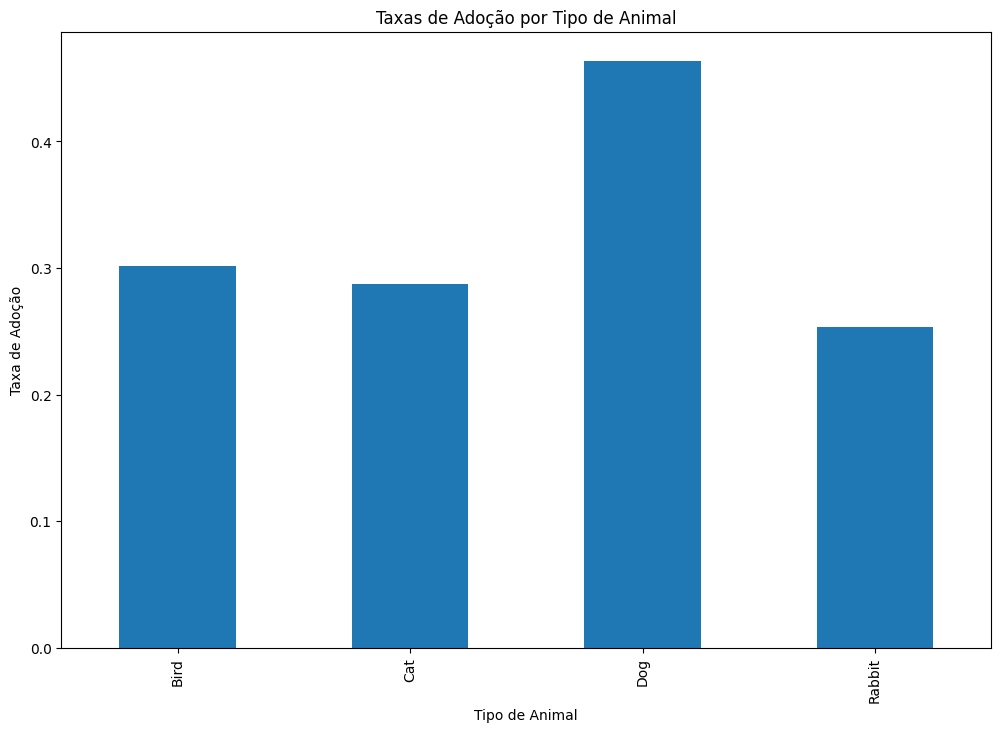



Estatística do Qui-Quadrado: 61.25
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre o tipo de animal e a probabilidade de adoção.
O valor do qui-quadrado (61.25) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [24]:
# This snippet provides a statistical analysis of the relationship between `PetType` and `AdoptionLikelihood` in the DataFrame `df`. 
# The analysis includes:
# - Counting animals by `PetType` (using value_counts and plotting with matplotlib)
# - Calculating the probability of adoption by `PetType` (using groupby and mean)
# - Performing a chi-squared test to determine if there is a significant relationship between `PetType` and `AdoptionLikelihood`
# - Outputting the results of the statistical analysis, including the chi-squared statistic, p-value, and degrees of freedom

# Distribuição dos animais por tipo de Pet 
# Contagem de animais por categoria 
print("Contagem de animais por categoria")
df['PetType'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Contagem de animais por PetType')
plt.ylabel('Número de animais')
plt.xlabel("")
plt.show()
print("\n")

# Probabilidade de adoção por tipo de Animal 
print("Probabilidade de adoção por tipo de pet")
animal_type_adoption_rate = df.groupby('PetType')['AdoptionLikelihood'].mean()
print(animal_type_adoption_rate)
print("\n")
plt.figure(figsize=(12, 8))
animal_type_adoption_rate.plot(kind='bar')
plt.title('Taxas de Adoção por Tipo de Animal')
plt.xlabel('Tipo de Animal')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")

# Teste de chi-quadrado
contingency_table = pd.crosstab(df['PetType'], df['AdoptionLikelihood'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre o tipo de animal e a probabilidade de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre o tipo de animal e a probabilidade de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")

# Este código inclui análise de dados e testes estatísticos para examinar a relação entre a raça do animal de estimação e a probabilidade de adoção. Ele calcula a distribuição das raças, as taxas de adoção e realiza um teste qui-quadrado.

Distribuição dos animais por raça


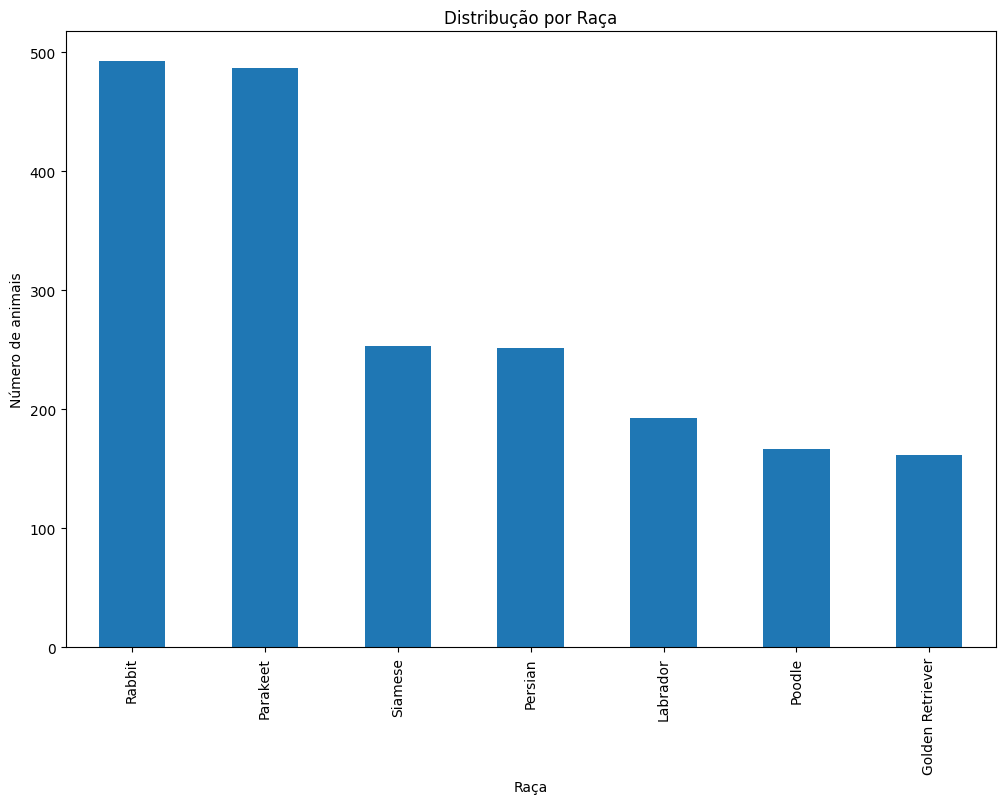



Indice de adoção por Raça
Breed
Golden Retriever    0.29
Labrador            0.72
Parakeet            0.30
Persian             0.27
Poodle              0.34
Rabbit              0.25
Siamese             0.31
Name: AdoptionLikelihood, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/4050028157.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adoption_rates = df.groupby('Breed')['AdoptionLikelihood'].mean()


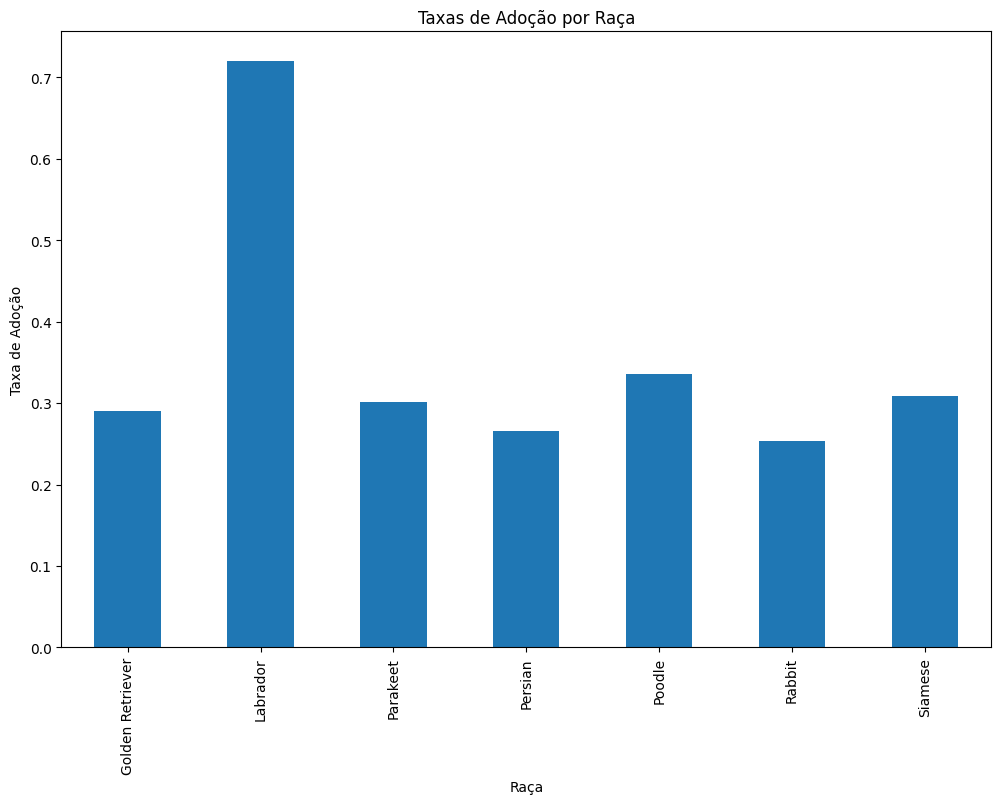



Estatística do Qui-Quadrado: 154.47
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre a raça e a probabilidade de adoção.
O valor do qui-quadrado (154.47) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [25]:

# This code includes data analysis and statistical tests to examine the relationship between pet breed and adoption likelihood. It calculates breed distribution, adoption rates, and performs a chi-squared test.

# Distribuição dos animais por raça de Pet
print("Distribuição dos animais por raça")
df['Breed'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Distribução por Raça')
plt.xlabel('Raça')
plt.ylabel('Número de animais')
plt.show()
print("\n")

print("Indice de adoção por Raça")
adoption_rates = df.groupby('Breed')['AdoptionLikelihood'].mean()
print(adoption_rates)
print("\n")
plt.figure(figsize=(12, 8))
adoption_rates.plot(kind='bar')
plt.title('Taxas de Adoção por Raça')
plt.xlabel('Raça')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['Breed'], df['AdoptionLikelihood'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a raça e a probabilidade de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a raça e a probabilidade de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")


# Resuma os resultados das estatísticas realizadas para avaliar a relação entre raça e taxa de adoção.

Média da taxa de adoção por raça
Breed
Golden Retriever    249.83
Labrador            248.58
Parakeet            261.80
Persian             247.31
Poodle              244.08
Rabbit              240.28
Siamese             247.22
Name: AdoptionFee, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/497354867.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  breed_adoption_rate_fee = df.groupby('Breed')['AdoptionFee'].mean()


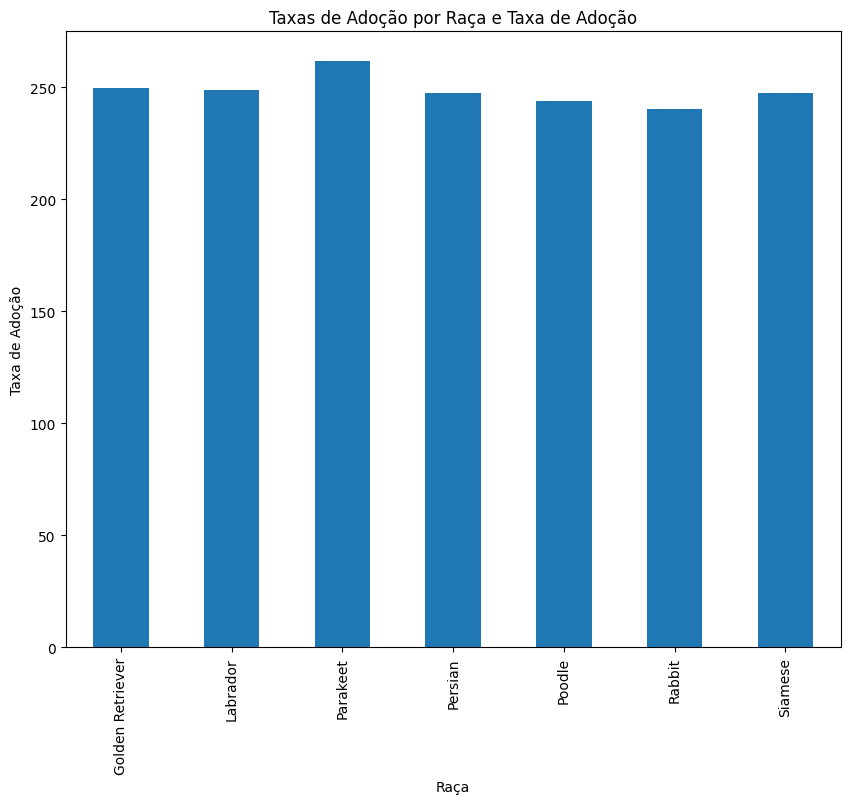



Estatística do Qui-Quadrado: 2945.45
Valor-p: 0.5305
Não há evidências suficientes para dizer que existe uma relação entre a raça e a taxa de adoção.
O valor do qui-quadrado (2945.45) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [26]:

# Summarize results of the statistics performed to evaluate the relationship between breed and adoption fee.
# Taxa de adoção relacinado ao valor da taxa
print("Média da taxa de adoção por raça")
breed_adoption_rate_fee = df.groupby('Breed')['AdoptionFee'].mean()
print(breed_adoption_rate_fee)
print("\n")
plt.figure(figsize=(10, 8))
breed_adoption_rate_fee.plot(kind='bar')
plt.title('Taxas de Adoção por Raça e Taxa de Adoção')
plt.xlabel('Raça')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['Breed'], df['AdoptionFee'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a raça e a taxa de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a raça e a taxa de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")


# O código a seguir realiza um teste qui-quadrado para determinar se existe uma relação entre o estado de saúde dos animais e sua taxa de adoção.
# Ele começa criando uma tabela de contingência usando `pd.crosstab()` e, em seguida, calcula a estatística qui-quadrado, valor p, graus de liberdade e valores esperados usando `chi2_contingency()`.
# Os resultados são impressos no console, juntamente com uma interpretação do valor p e do valor qui-quadrado em termos da força do relacionamento entre as variáveis.

Taxa de adoção por condição de saúde na dos animais
HealthCondition
Doente      248.41
Saudável    249.32
Name: AdoptionFee, dtype: float64




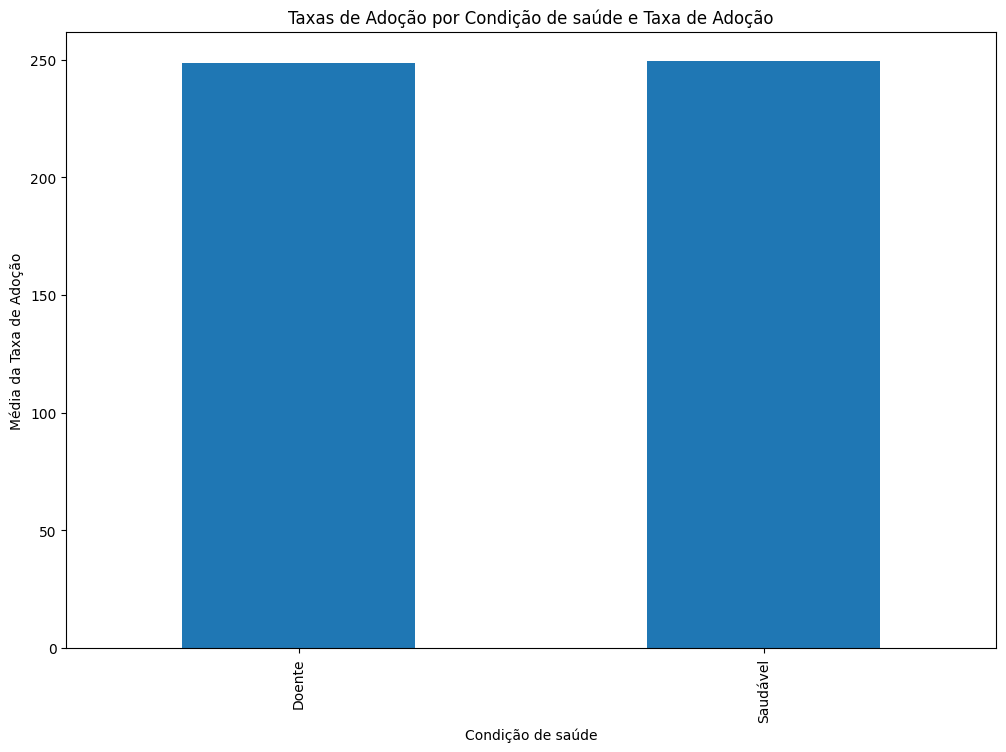



Estatística do Qui-Quadrado: 505.08
Valor-p: 0.3320
Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a taxa de adoção.
O valor do qui-quadrado (505.08) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.


Condição de saúde em relação a taxa de adoção
HealthCondition
Doente       394
Saudável    1613
Name: AdoptionLikelihood, dtype: int64




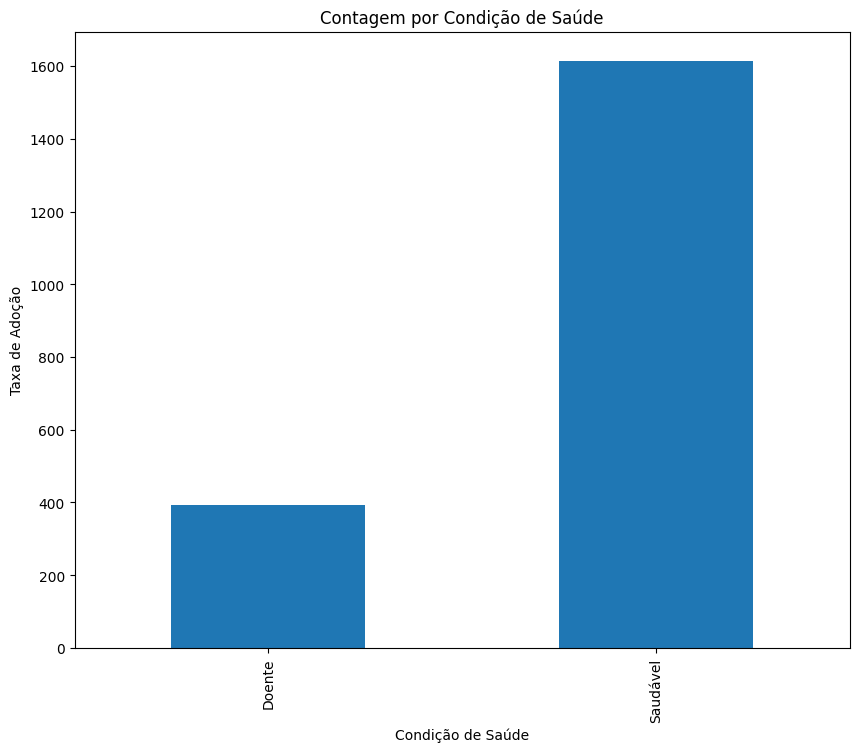



Estatística do Qui-Quadrado: 118.24
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre a condição de saúde e a probabilidade de adoção.
O valor do qui-quadrado (118.24) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [27]:

# The following code performs a chi-squared test to determine whether there is a relationship between the health condition of animals and their adoption fee.
# It begins by creating a contingency table using `pd.crosstab()`, then calculates the chi-squared statistic, p-value, degrees of freedom, and expected values using `chi2_contingency()`.
# The results are printed to the console, along with an interpretation of the p-value and chi-squared value in terms of the strength of the relationship between the variables.
df['HealthCondition'] = df['HealthCondition'].replace(False, "Saudável")
df['HealthCondition'] = df['HealthCondition'].replace(True, "Doente")


# Condição de saúde pela taxa de adoção
print("Taxa de adoção por condição de saúde na dos animais")
Health_adoption_rate_fee = df.groupby('HealthCondition')['AdoptionFee'].mean()
print(Health_adoption_rate_fee)
print("\n")
plt.figure(figsize=(12, 8))
Health_adoption_rate_fee.plot(kind='bar')
plt.title('Taxas de Adoção por Condição de saúde e Taxa de Adoção')
plt.xlabel('Condição de saúde')
plt.ylabel('Média da Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['HealthCondition'], df['AdoptionFee'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a condição de saúde e a taxa de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a taxa de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")


# Health Condition
print("Condição de saúde em relação a taxa de adoção")
health_adoption_rate = df.groupby('HealthCondition')['AdoptionLikelihood'].count()
print(health_adoption_rate)
print("\n")
plt.figure(figsize=(10, 8))
health_adoption_rate.plot(kind='bar')
plt.title('Contagem por Condição de Saúde')
plt.xlabel('Condição de Saúde')
plt.ylabel('Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['HealthCondition'], df['AdoptionLikelihood'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a condição de saúde e a probabilidade de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a probabilidade de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")



# Correlação computacional entre AdoptionLikelihood e AgeMonths.
# Calcule taxas de adoção para diferentes faixas etárias: Filhote (0-12 meses), Adulto (12-36 meses) e Sênior (36 meses ou mais).
# Calcular taxas de adoção por AdoptionLikelihood.
# Trace um gráfico de barras das taxas de adoção por faixa etária.
# Execute o teste qui-quadrado para avaliar a relação entre AdoptionLikelihood e AgeMonths.

Correlation coefficient: -0.20220897333608434
AgeMonths
Puppy      6.68
Adult     24.01
Senior    68.51
Name: AgeMonths, dtype: float64




/var/folders/f5/ddwx0swd3lz32c88c4c44q400000gn/T/ipykernel_52341/2421809719.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adoption_rates_by_age = df.groupby(age_groups)['AgeMonths'].mean()


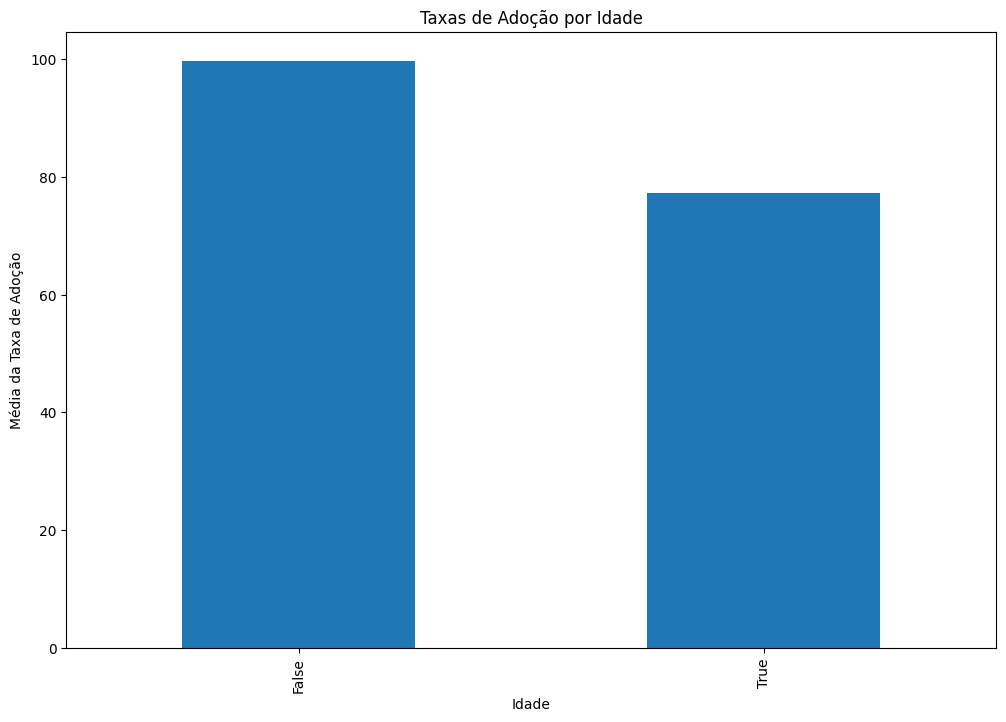



Estatística do Qui-Quadrado: 357.90
Valor-p: < 0.001
Isso sugere que há uma relação significativa entre a condição de saúde e a taxa de adoção.
O valor do qui-quadrado (357.90) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.




In [28]:
# Compute correlation between AdoptionLikelihood and AgeMonths.
# Compute adoption rates for different age groups: Puppy (0-12 months), Adult (12-36 months), and Senior (36 months and older).
# Compute adoption rates by AdoptionLikelihood.
# Plot bar chart of adoption rates by age group.
# Perform chi-squared test to assess the relationship between AdoptionLikelihood and AgeMonths.

# Correlation coefficient
correlation = df['AdoptionLikelihood'].corr(df['AgeMonths'])
print(f"Correlation coefficient: {correlation}")

# Group ages and compare adoption rates
age_groups = pd.cut(df['AgeMonths'], bins=[0, 12, 36, 100], labels=['Puppy', 'Adult', 'Senior'])
adoption_rates_by_age = df.groupby(age_groups)['AgeMonths'].mean()
print(adoption_rates_by_age)



# Idade pela taxa de adoção
adoption_rates_by_age = df.groupby('AdoptionLikelihood')['AgeMonths'].mean()
print("\n")
plt.figure(figsize=(12, 8))
adoption_rates_by_age.plot(kind='bar')
plt.title('Taxas de Adoção por Idade')
plt.xlabel('Idade')
plt.ylabel('Média da Taxa de Adoção')
plt.show()
print("\n")
# Perform chi-squared test
contingency_table = pd.crosstab(df['AdoptionLikelihood'], df['AgeMonths'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Estatística do Qui-Quadrado: {chi2:.2f}")
if p < 0.001:
    print(f"Valor-p: < 0.001")
    print("Isso sugere que há uma relação significativa entre a condição de saúde e a taxa de adoção.")
else:
    print(f"Valor-p: {p:.4f}")
    print("Não há evidências suficientes para dizer que existe uma relação entre a condição de saúde e a taxa de adoção.")
print(f"O valor do qui-quadrado ({chi2:.2f}) indica a força da relação entre as variáveis. Quanto maior o valor do qui-quadrado, mais forte a relação.")
print("\n")






# Crie uma matriz variável fictícia para df2, usada para construir a matriz de correlação.

In [29]:
# Create a dummy variable matrix for df2, used to build the correlation matrix.

df2= df
df2 = pd.get_dummies(df2, columns=["PetType"])
df2 = pd.get_dummies(df2, columns=["Breed"])
df2 = pd.get_dummies(df2, columns=["Color"])
df2 = pd.get_dummies(df2, columns=["Size"])
df2 = pd.get_dummies(df2, columns=["HealthCondition"])




# Calcula a correlação e imprime-a no console.

In [30]:
# Compute the correlation and prints it to console.
correlation_matrix = df2.corr()
print(correlation_matrix)


                          AgeMonths  WeightKg  Vaccinated  TimeInShelterDays  \
AgeMonths                  1.00e+00 -2.92e-02   -1.80e-03           3.68e-02   
WeightKg                  -2.92e-02  1.00e+00    2.25e-02          -9.72e-04   
Vaccinated                -1.80e-03  2.25e-02    1.00e+00          -1.12e-03   
TimeInShelterDays          3.68e-02 -9.72e-04   -1.12e-03           1.00e+00   
AdoptionFee               -3.81e-02 -2.37e-03    2.17e-02          -7.10e-03   
PreviousOwner              3.49e-02 -4.92e-02   -1.15e-02           7.96e-03   
AdoptionLikelihood        -2.02e-01  1.76e-02    3.01e-01           8.87e-03   
PetType_Bird              -2.26e-02  6.59e-03    4.04e-03          -1.41e-02   
PetType_Cat               -1.00e-02 -4.04e-03   -5.09e-03          -2.35e-02   
PetType_Dog                7.61e-03 -3.13e-03    2.00e-02           5.58e-03   
PetType_Rabbit             2.49e-02  7.04e-04   -1.93e-02           3.20e-02   
Breed_Golden Retriever     1.06e-02 -3.1

# Crie um mapa de calor para visualizar a matriz de correlação, mostrando as correlações entre diferentes recursos.

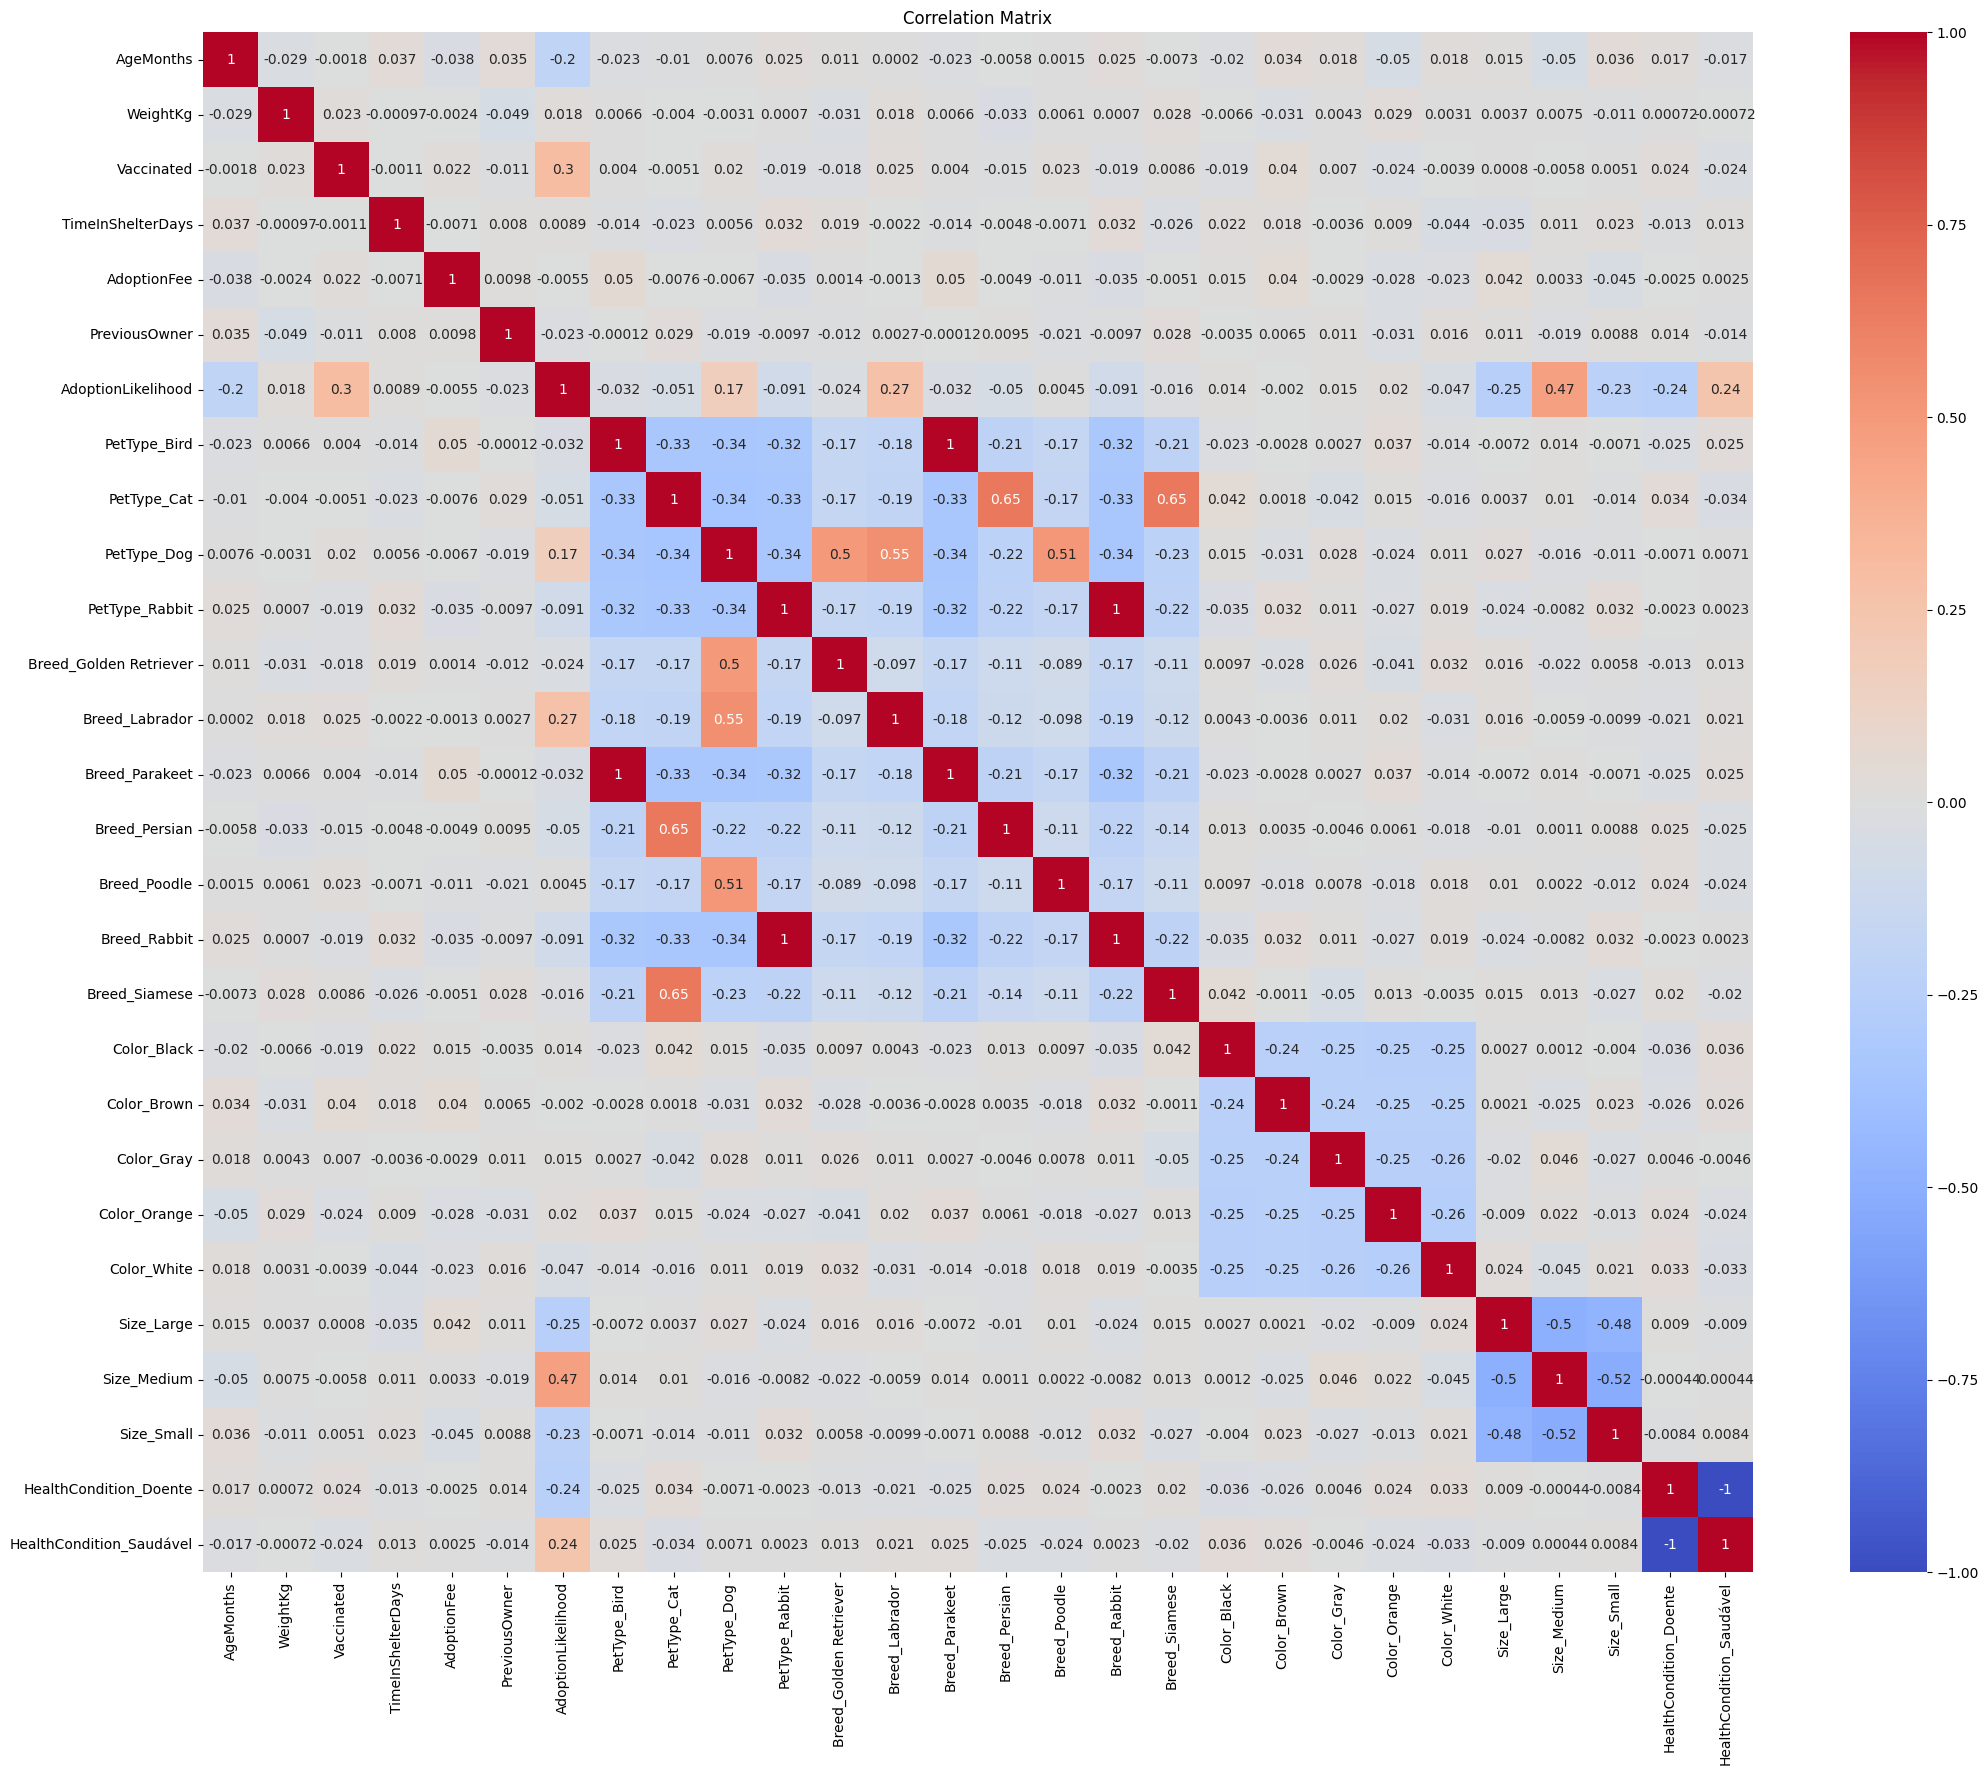

In [31]:

# Create a heatmap to visualize the correlation matrix, showing the correlations between different features.

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Trace um histograma do tempo de adoção de animais em abrigos usando pandas e matplotlib.
# Assumindo que 'OutcomeType' indica o status de adoção

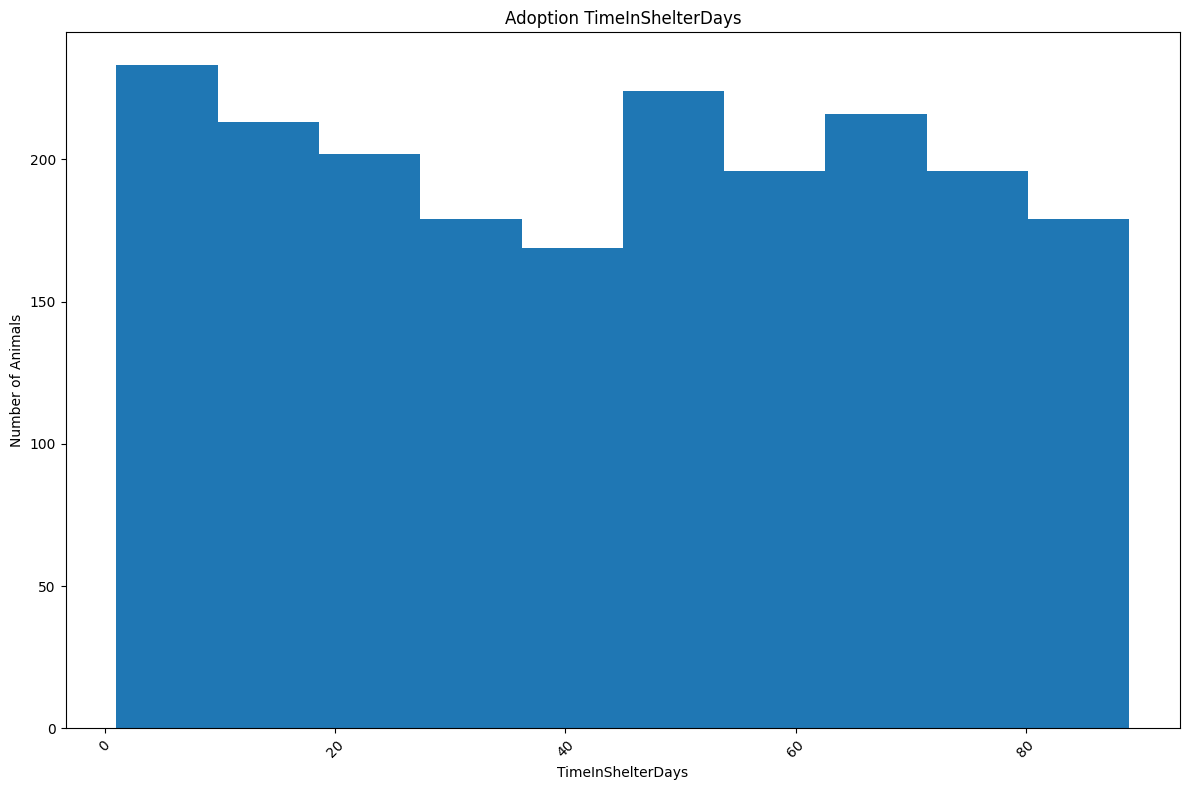

In [32]:
# Plot a histogram of animal adoption time in shelter using pandas and  matplotlib.
# Assuming 'OutcomeType' indicates adoption status
adoption_counts = df['TimeInShelterDays'].sort_values()
plt.figure(figsize=(12, 8))
adoption_counts.plot(kind='hist')
plt.title('Adoption TimeInShelterDays')
plt.xlabel('TimeInShelterDays')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary:
The task was to analyze a dataset of pet adoption records to gain insights into the factors that influence adoption rates. The solution involved a multi-step process:

Data Loading and Cleaning: The data was loaded from a CSV file into a Pandas DataFrame and checked for missing values and duplicates.
Data Exploration: The dataset was explored using descriptive statistics and visualizations to understand the distribution of features and identify potential predictors of adoption.
Data Analysis: Statistical analysis was performed to calculate correlations between features and adoption outcomes, and to determine adoption rates for different categories within features.
Data Visualization: Visualizations such as heatmaps and bar charts were created to illustrate the correlations and insights found in the data analysis step.
Feature Engineering: A new feature, 'Age groups', was created to indicate whether a pet is considered 'Puppy', 'Adult' or 'Senior' based on an age threshold.
Conclusion
The analysis revealed several insights into the factors influencing pet adoption:

Younger and healthier pets tend to have higher adoption rates.
Certain breeds, such as Labrador Retrievers, have higher adoption rates than others.
Dogs have higher adoption rates than other types of pets.
Was Investiged the impact of other factors, such as the length of time a pet has been in the shelter, on adoption rates.

Insights and Next Steps
The insights gained from this analysis can be used to inform strategies for improving pet adoption outcomes. 

Next steps could include:

Building a predictive model to estimate the adoption likelihood of individual pets.
Conducting further analysis to understand the reasons behind the observed correlations and adoption patterns.


# Resumo:
A tarefa era analisar um conjunto de dados de registros de adoção de animais de estimação para obter insights sobre os fatores que influenciam as taxas de adoção. A solução envolveu um processo de várias etapas:

Carregamento e limpeza de dados: os dados foram carregados de um arquivo CSV em um Pandas DataFrame e verificados quanto a valores ausentes e duplicados.
Exploração de dados: O conjunto de dados foi explorado usando estatísticas descritivas e visualizações para compreender a distribuição de recursos e identificar potenciais preditores de adoção.
Análise de dados: A análise estatística foi realizada para calcular correlações entre recursos e resultados de adoção e para determinar taxas de adoção para diferentes categorias dentro de recursos.
Visualização de dados: Visualizações como mapas de calor e gráficos de barras foram criadas para ilustrar as correlações e insights encontrados na etapa de análise de dados.
Engenharia de Recursos: Um novo recurso, 'Faixas etárias', foi criado para indicar se um animal de estimação é considerado 'Filhote de Cachorro', 'Adulto' ou 'Sênior' com base em um limite de idade.
Conclusão
A análise revelou vários insights sobre os fatores que influenciam a adoção de animais de estimação:

Animais de estimação mais jovens e saudáveis ​​tendem a ter taxas de adoção mais altas.
Certas raças, como Labrador Retrievers, têm taxas de adoção mais altas do que outras.
Os cães têm taxas de adoção mais altas do que outros tipos de animais de estimação.
Foi investigado o impacto de outros fatores, como o tempo de permanência do animal no abrigo, nas taxas de adoção.

Insights e próximas etapas
Os insights obtidos com esta análise podem ser usados ​​para informar estratégias para melhorar os resultados da adoção de animais de estimação.

As próximas etapas podem incluir:

Construindo um modelo preditivo para estimar a probabilidade de adoção de animais de estimação individuais.
Realização de análises adicionais para compreender as razões por trás das correlações observadas e dos padrões de adoção.